In [1]:
# EDA
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')
import string
from spacy.tokens import Doc
nltk.download('averaged_perceptron_tagger')
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import spacy #natural language processing
import en_core_web_sm
import re
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Data Science for PM/Diabetes Continuous Glucose Monitoring – Data Export.xlsx")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#df = pd.read_excel("Diabetes Continuous Glucose Monitoring – Data Export.xlsx")
df.shape

(37844, 63)

## EDA

In this section, we conducted analysis for the following steps:
1. Inspect columns
2. Summary statistics 
3. Check missing values
4. Check outliers

__1. Columns__
1. We removed columns that only have missing values
2. We removed columns that are not informative (with too many missing values and/or too granular information)

In [4]:
df.head()

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,Domain,Sentiment,Published Date (GMT-04:00) New York,Author Gender,Author URL,Author Name,Author Handle,Author ID,Author Location - Country 1,Author Location - State/Province 1,Author Location - City 1,Author Location - Country 2,Author Location - State/Province 2,Author Location - City 2,Author Location - Other,Author Reddit Karma,Followers/Daily Unique Visitors/Subscribers,Professions,Interests,Positive Objects,Negative Objects,Richness,Tags,Quoted Post,Quoted Author Name,Quoted Author Handle,Total Engagements,Post Comments,Post Likes,Post Shares,Post Views,Post Dislikes,Reddit Score,Product Name,Product Hierarchy,Rating,@Mention Media Tags,Source Name,LexisNexis Source Publisher,LexisNexis Source Category,LexisNexis Source Genre,LexisNexis Source Quality,LexisNexis Company - High,LexisNexis Company - Any,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects
0,BRDRDT2-t1_imq98sr,"My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.",NaN,Have you been denied a second/third pump? Feeling like I messed up.,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/x3dcsh/have_you_been_denied_a_secondthird_pump_feeling/imq98sr/,NaN,reddit.com,Neutrals,"Sep 1, 2022 7:41:36 PM",Unknown,https://www.reddit.com/user/itsgucciflipflopsbro,itsgucciflipflopsbro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4472,42768.0,NaN,NaN,number,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,r/diabetes_t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.,NaN,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/x2x5wr/metformin/impbcf4/,NaN,reddit.com,Positives,"Sep 1, 2022 3:53:47 PM",Unknown,https://www.reddit.com/user/Unrealgecko,Unrealgecko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5502,42760.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,r/diabetes_t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1565738759353602048,"i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)",NaN,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/1565738759353602048,NaN,twitter.com,Positives,"Sep 2, 2022 12:29:44 PM",Unknown,http://twitter.com/bromid,dimo,bromid,2156968075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,1912.0,NaN,NaN,"dexcom g6, omnipod system",NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17944607459251789,"MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes",NaN,NaN,Instagra

In [5]:
# Removing all columns that are completely blank
df=df.dropna(axis=1, how='all')
df.shape

(37844, 39)

__2. Summary Statistics__

In [6]:
# numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Followers/Daily Unique Visitors/Subscribers,30820.0,433775.763400,3.093652e+06,1.0,21671.5,38617.0,78519.00,42298115.0
Richness,37844.0,1.903393,1.725630e+00,0.0,0.0,2.0,3.00,15.0
Total Engagements,618.0,55.522654,2.695147e+02,1.0,5.0,12.0,31.00,5782.0
Post Comments,413.0,6.237288,1.696275e+01,1.0,1.0,3.0,6.00,308.0
Post Likes,594.0,53.429293,2.700113e+02,1.0,4.0,11.0,28.75,5720.0
Rating,113.0,2.657522,1.712236e+00,1.0,1.0,2.0,5.00,5.0


In [7]:
# unique values counts
for col in df[['Source Type', 'Post Type',
       'Is Paid', 'Media Type', 'Domain', 'Sentiment','Professions', 'Interests', 
       'Richness', 'Source Name']]:
       print(df[col].value_counts())

Forums       34795
Blogs         1489
Twitter        826
Instagram      630
Comments        85
Facebook        19
Name: Source Type, dtype: int64
Replies and Comments    29892
Original                 5273
Name: Post Type, dtype: int64
No    37844
Name: Is Paid, dtype: int64
No Media              34826
Link                   1765
Image                  1065
Link; Image              86
Video                    60
Video; Image             33
Link; Video               6
Video; Link; Image        1
Link; Video; Image        1
Video; Link               1
Name: Media Type, dtype: int64
reddit.com                                         33690
twitter.com                                          826
instagram.com                                        630
forum.tudiabetes.org                                 209
community.whattoexpect.com                           146
diabetesdaily.com                                    143
apps.apple.com                                        73
community.baby

__Based on the preliminary insepction, we have the following thoughts.__

Additional columns to drop: 

1) the values are uniform across the dataset and thus the column is not informative (['Is Paid'])

2) the column may not be useful for our analysis due to too many missing values, or due to the nature of the information (['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2','Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender';'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID'])

Observations:

1) None of the posts in this dataset is paid

2) Source type

3) Domain (reddit most)

4) Sentiment

5) Source name (x% has diabetes-related xx)



In [8]:
# List of the columns to drop
to_drop = ['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2',
           'Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender',
           'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID']

In [9]:
# Drop the columns specified
df = df.drop(to_drop, axis = 1)
df.columns

Index(['Post ID', 'Sound Bite Text', 'Title', 'Source Type', 'Post Type',
       'Is Paid', 'Domain', 'Sentiment', 'Published Date (GMT-04:00) New York',
       'Author Name', 'Author Reddit Karma',
       'Followers/Daily Unique Visitors/Subscribers', 'Positive Objects',
       'Negative Objects', 'Richness', 'Total Engagements', 'Post Comments',
       'Post Likes', 'Reddit Score', 'Rating', 'Source Name'],
      dtype='object')

__3. Missing values__

In [10]:
df.isna().sum()

Post ID                                            0
Sound Bite Text                                    0
Title                                           1571
Source Type                                        0
Post Type                                       2679
Is Paid                                            0
Domain                                             0
Sentiment                                          0
Published Date (GMT-04:00) New York                0
Author Name                                      955
Author Reddit Karma                                0
Followers/Daily Unique Visitors/Subscribers     7024
Positive Objects                               29039
Negative Objects                               33297
Richness                                           0
Total Engagements                              37226
Post Comments                                  37431
Post Likes                                     37250
Reddit Score                                  

__4. Distribution and Outliers__

In [11]:
# Continuous features
# Function to detect outlier values that are outside given standard deviations
def std_outlier_test(df, threshold=3):
    std = np.std(df)
    mean = np.mean(df)
    lb, ub = (-threshold*std+mean, threshold*std+mean)
    mask = (df<lb) | (df>ub)
    print("The outlier thresholds are: %f, %f" % (lb, ub))
    print("The number of outliers is: %d" % len(df[mask]))
    return lb, ub, df[mask]

# Define function to plot distribution and identify outliers
def plot_outlier_test(df, col, threshold = 3):
    # 3 standard deviations away from mean
    lb, ub, outliers = std_outlier_test(df[col], threshold)
    #lb, ub, outliers = iqr_outlier_test(df, col, 3)

    fig, ax = plt.subplots(1,2, figsize = (10, 4))
    sns.histplot(data = df, x = col, bins = 20, ax = ax[0])
    sns.boxplot(data = df, x = col, ax = ax[1])
    plt.axvline(x = lb, color = 'red', linestyle = '--')
    plt.axvline(x = ub, color = 'red', linestyle = '--')
    plt.title('Distribution of %s' % col)
    plt.show()
    return outliers

In [12]:
# Categorical features

# Define function to print value counts and count plot
def plot_categories(df, col):
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))

    sns.countplot(x=df[col])
    plt.title('Distribution of %s' % col)
    plt.show()
    return

In [13]:
pd.to_datetime(df['Published Date (GMT-04:00) New York'])

0       2022-09-01 19:41:36
1       2022-09-01 15:53:47
2       2022-09-02 12:29:44
3       2022-09-01 14:20:21
4       2022-09-01 19:35:52
5       2022-08-31 18:59:06
6       2022-09-01 20:46:59
7       2022-09-02 03:50:23
8       2022-09-01 18:06:24
9       2022-09-01 15:49:55
10      2022-09-02 01:36:36
11      2022-09-01 21:14:01
12      2022-09-01 21:25:14
13      2022-09-02 13:06:09
14      2022-09-01 15:35:23
15      2022-09-01 14:12:29
16      2022-09-02 11:14:42
17      2022-09-02 13:16:59
18      2022-09-01 18:11:52
19      2022-09-01 15:44:12
20      2022-09-02 13:11:16
21      2022-09-01 23:18:17
22      2022-09-01 19:36:40
23      2022-09-02 09:56:43
24      2022-09-02 11:54:10
25      2022-09-01 14:27:17
26      2022-09-01 15:32:12
27      2022-09-01 17:19:52
28      2022-09-01 20:30:22
29      2022-09-02 13:00:25
30      2022-09-01 22:34:00
31      2022-09-02 10:34:22
32      2022-09-02 12:27:30
33      2022-09-02 10:07:14
34      2022-09-02 12:45:47
35      2022-09-01 1

In [14]:
# Date features

# Define function to plot count by distribution
def plot_dates(df, col):
  df[col] = pd.to_datetime(df[col])
  df['Month'] = df[col].map(lambda dt: dt.strftime('%Y-%m'))
  grouped_df = df.groupby('Month').size().to_frame("count").reset_index()
  grouped_df.plot(kind='bar', x='Month', y='count')
  plt.show()

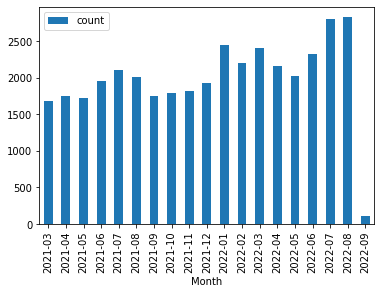

In [15]:
plot_dates(df, 'Published Date (GMT-04:00) New York')

# 1. General CGM analysis
What are consumers saying about CGMs? 

In [16]:
df.head()

,Post ID,Sound Bite Text,Title,Source Type,Post Type,Is Paid,Domain,Sentiment,Published Date (GMT-04:00) New York,Author Name,Author Reddit Karma,Followers/Daily Unique Visitors/Subscribers,Positive Objects,Negative Objects,Richness,Total Engagements,Post Comments,Post Likes,Reddit Score,Rating,Source Name,Month
0,BRDRDT2-t1_imq98sr,"My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.",Have you been denied a second/third pump? Feeling like I messed up.,Forums,Replies and Comments,No,reddit.com,Neutrals,2022-09-01 19:41:36,itsgucciflipflopsbro,4472,42768.0,number,NaN,0,NaN,NaN,NaN,0,NaN,r/diabetes_t1,2022-09
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.,Metformin,Forums,Replies and Comments,No,reddit.com,Positives,2022-09-01 15:53:47,Unrealgecko,5502,42760.0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,r/diabetes_t1,2022-09
2,1565738759353602048,"i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)",NaN,Twitter,Replies and Comments,No,twitter.com,Positives,2022-09-02 12:29:44,dimo,-,1912.0,"dexcom g6, omnipod system",NaN,3,NaN,NaN,NaN,-,NaN,NaN,2022-09
3,17944607459251789,"MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes",NaN,Instagram,Original,No,instagram.com,Neutrals,2022-09-01 14:20:21,NaN,-,NaN,NaN,NaN,0,11.0,NaN,11.0,-,NaN,NaN,2022-09
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My doctor told me when I was 10 that I should never stay in a hot tub for more than 15 minutes because it can lower glucose levels to dangerous regions. I have never payed attention to that but if I am in a hot tub I keep a close eye on my CGM because it does lower my level some.,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,reddit.com,Neutrals,2022-09-01 19:35:52,rinkidinkidoo,2976,93772.0,NaN,NaN,2,NaN,NaN,NaN,0,NaN,r/diabetes,2022-09


### Tokenize, remove stop words, and URL

In [24]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer() 
nlp = spacy.load('en_core_web_sm')
text = df['Sound Bite Text'] + df['Title'].fillna(' ')

# tokenize tweets with NTLK's TweetTokenizer
cleaned_tweets = []
for tw in text:
    # create list of tokenized words excluding stop words 
    cleaned = [word for word in tknzr.tokenize(tw.lower()) if word not in nlp.Defaults.stop_words 
               and len(word) > 2]
    cleaned_tweets.append(' '.join(cleaned))
    
# remove http urls in tweets
# urlfree_tweets = []
# for tweet in cleaned_tweets:
#     tweet = tweet.strip()
#     urlfree = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", tweet)
#     urlfree_tweets.append(urlfree)

In [25]:
df['clean_text'] = urlfree_tweets

### Lemmatize

In [26]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize(raw_text):
    lemmatized = []
    for tweet in raw_text:
        doc = nlp(tweet)
        lemmatized.append(" ".join([token.lemma_ for token in doc]))
    return lemmatized
# df['lemmatized_text'] = lemmatized

df['lemmatized_text'] = lemmatize(df['clean_text'])
df.head()

,Post ID,Sound Bite Text,Title,Source Type,Post Type,Is Paid,Domain,Sentiment,Published Date (GMT-04:00) New York,Author Name,Author Reddit Karma,Followers/Daily Unique Visitors/Subscribers,Positive Objects,Negative Objects,Richness,Total Engagements,Post Comments,Post Likes,Reddit Score,Rating,Source Name,Month,clean_text,lemmatized_text
0,BRDRDT2-t1_imq98sr,"My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.",Have you been denied a second/third pump? Feeling like I messed up.,Forums,Replies and Comments,No,reddit.com,Neutrals,2022-09-01 19:41:36,itsgucciflipflopsbro,4472,42768.0,number,NaN,0,NaN,NaN,NaN,0,NaN,r/diabetes_t1,2022-09,numbers great estimated a1c ish doesn't care wants actual labs look dexcom stuff word it.have denied second pump feeling like messed,number great estimate a1c ish do not care want actual lab look dexcom stuff word it.have deny second pump feeling like mess
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.,Metformin,Forums,Replies and Comments,No,reddit.com,Positives,2022-09-01 15:53:47,Unrealgecko,5502,42760.0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,r/diabetes_t1,2022-09,tried little effects help insulin resistance found tandom dexcom superior.metformin,try little effect help insulin resistance find tandom dexcom superior.metformin
2,1565738759353602048,"i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)",NaN,Twitter,Replies and Comments,No,twitter.com,Positives,2022-09-02 12:29:44,dimo,-,1912.0,"dexcom g6, omnipod system",NaN,3,NaN,NaN,NaN,-,NaN,NaN,2022-09,ran characters i'll newly diagnosed idea feel react etc i'm resource use dexcom omnipod system desperately trying upgrade new closed loop omnipod system,run character I will newly diagnose idea feel react etc I be resource use dexcom omnipod system desperately try upgrade new closed loop omnipod system
3,17944607459251789,"MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes",NaN,Instagram,Original,No,instagram.com,Neutrals,2022-09-01 14:20:21,NaN,-,NaN,NaN,NaN,0,11.0,NaN,11.0,-,NaN,NaN,2022-09,lunch ate 10:30 unit novolog insulin pump grilled chicken feta cheese carrots apples macadamia nuts mixed drizzled briannas_salad real french vinaigrette dressing kids people eating feel bad tell probably enjoying yep enjoying simple simple food little insulin required especially outside heat hours going #t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes,lunch eat 10:30 unit novolog insulin pump grill chicken feta cheese carrot apple macadamia nut mixed drizzle briannas_salad real french vinaigrette dress kid people eat feel bad tell probably enjoy yep enjoy simple simple food little insulin require especially outside heat hour g

### Vectorizing

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
documents = df['lemmatized_text']
X = vectorizer.fit_transform(documents)
X.shape

(37844, 34204)

## KMeans clustering

### Elbow Method

In [28]:
from sklearn.cluster import KMeans
cluster_nums = range(1,20)
distortions = []

for k in cluster_nums:
    kmeans = KMeans(n_clusters=k, init='k-means++') 
    kmeans.fit_predict(X)
    distortions.append(kmeans.inertia_)

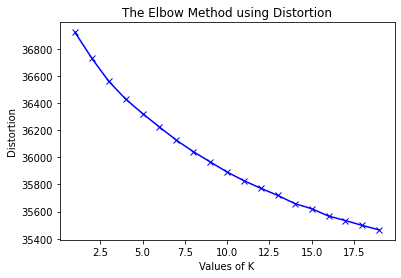

In [29]:
plt.plot(cluster_nums, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### Silhouette Method

In [41]:
from sklearn.metrics import silhouette_score
cluster_nums = [2,3,4,5,6,7,8,9,10]
for k in cluster_nums:
    kmeans = KMeans(n_clusters=k, init='k-means++') 
    kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    print(k)
    print('Silhouette Score: %.5f' % score)

2
Silhouette Score: 0.00421
3
Silhouette Score: 0.00472
4
Silhouette Score: 0.00441
5
Silhouette Score: 0.00494
6
Silhouette Score: 0.00544
7
Silhouette Score: 0.00562
8
Silhouette Score: 0.00565
9
Silhouette Score: 0.00589
10
Silhouette Score: 0.00579


### Predict Cluster Labels

In [31]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++') 
predicted_labels = kmeans.fit_predict(X)
df['Kmeans_labels'] = predicted_labels

In [32]:
print("Top 10 terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=", ")
        #print(f"term: {terms[ind]} \t centroid distance: {order_centroids[i, ind]}")
    print()

Top 10 terms per cluster:
Cluster 0:
libre, freestyle, sensor, dexcom, use, day, app, cgm, like, phone, 
Cluster 1:
dexcom, cgm, low, like, time, day, sensor, insulin, year, use, 
Cluster 2:
blood, sugar, glucose, monitor, continuous, cgm, low, insulin, eat, high, 
Cluster 3:
pump, medtronic, dexcom, tandem, cgm, year, insulin, omnipod, tslim, slim, 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Sentiment Analysis

In [33]:
cluster_df = df.groupby('Kmeans_labels')


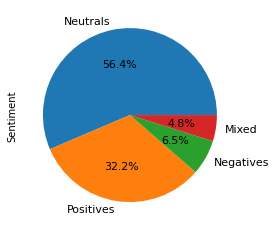

In [34]:
#fig = plt.figure(figsize=(6,6), dpi=200)
cluster_df.get_group(3)['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0, fontsize=11)

## Source Analysis

In [35]:
df.groupby('Kmeans_labels').size()

Kmeans_labels
0     4577
1    21331
2     6739
3     5197
dtype: int64

In [36]:
#fig = plt.figure(figsize=(6,6), dpi=200)
cluster_df.get_group(0)['Source Name'].value_counts().loc[lambda x: x>25]#.plot(kind='bar', title='Cluster 4 Reddit Sources')

r/diabetes               1443
r/diabetes_t1            1016
r/Type1Diabetes           416
r/Freestylelibre          225
r/diabetes_t2             167
r/GestationalDiabetes     105
r/dexcom                   88
r/Biohackers               37
r/type2diabetes            32
r/AskReddit                27
Name: Source Name, dtype: int64

In [37]:
cluster_df.get_group(1)['Source Name'].value_counts().loc[lambda x: x>5]#.plot(kind='bar', title='Cluster 4 Reddit Sources')

r/diabetes_t1            8529
r/diabetes               5541
r/Type1Diabetes          3718
r/dexcom                  504
r/diabetes_t2             117
r/AskReddit                99
r/BumpersWhoBolus          36
r/GestationalDiabetes      35
r/senseonics               34
r/Freestylelibre           28
r/AmItheAsshole            28
r/TandemDiabetes           23
r/science                  19
r/Omnipod                  18
r/Hypoglycemia             18
r/keto                     16
r/antiwork                 14
r/Biohackers               12
r/WhitePeopleTwitter       11
r/wallstreetbets           11
r/type2diabetes            11
r/news                     10
r/illnessfakers             9
r/politics                  9
r/TrueOffMyChest            9
r/PCOS                      8
r/MovieDetails              8
r/explainlikeimfive         8
r/UpliftingNews             7
r/GalaxyWatch               7
r/WearOS                    7
r/pharmacy                  7
r/nursing                   7
r/flying  

In [38]:
cluster_df.get_group(2)['Source Name'].value_counts().loc[lambda x: x>25]#.plot(kind='bar', title='Cluster 4 Reddit Sources')

r/diabetes               1170
r/diabetes_t1            1166
r/Type1Diabetes           613
r/diabetes_t2             200
r/GestationalDiabetes     119
r/keto                    114
r/PCOS                     79
r/AskReddit                75
r/AmItheAsshole            58
r/Biohackers               43
r/intermittentfasting      35
r/Hypoglycemia             33
r/dexcom                   29
r/fasting                  29
r/gadgets                  26
Name: Source Name, dtype: int64

In [43]:
cluster_df.get_group(3)['Source Name'].value_counts()#.loc[lambda x: x>5]#.plot(kind='bar', title='Cluster 4 Reddit Sources')

r/diabetes_t1              2573
r/Type1Diabetes            1140
r/diabetes                 1037
r/dexcom                     42
r/AskReddit                  24
r/TandemDiabetes             22
r/BumpersWhoBolus            10
r/MadeMeSmile                 6
r/Medtronic670G               6
r/Omnipod                     5
r/science                     5
r/Futurology                  4
r/WhitePeopleTwitter          4
r/news                        3
r/Damnthatsinteresting        3
r/CysticFibrosis              3
r/senseonics                  3
r/entitledparents             3
r/MomForAMinute               3
r/diabetes_t2                 3
r/NoStupidQuestions           3
r/Vitards                     3
r/AmItheAsshole               3
r/mildlyinfuriating           2
r/facepalm                    2
r/ontario                     2
r/AddisonsDisease             2
r/mildlyinteresting           2
r/2007scape                   2
r/explainlikeimfive           2
r/Methadone                   2
r/politi